<a href="https://colab.research.google.com/github/Karan1106/Deep-Learning/blob/master/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
_URL="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip= tf.keras.utils.get_file("cats_and_dogs.zip", origin=_URL, extract=True)
PATH= os.path.join(os.path.dirname(path_to_zip),'cats_and_dogs_filtered')

train_dir=os.path.join(PATH,'train')
validation_dir=os.path.join(PATH,'validation')

train_cats_dir=os.path.join(train_dir, 'cats')
train_dogs_dir=os.path.join(train_dir, 'dogs')
validation_cats_dir=os.path.join(validation_dir, 'cats')
validation_dogs_dir=os.path.join(validation_dir, 'dogs')

In [4]:
#analysing data
num_cats_tr= len(os.listdir(train_cats_dir))
num_dogs_tr= len(os.listdir(train_dogs_dir))

num_cats_val= len(os.listdir(validation_cats_dir))
num_dogs_val= len(os.listdir(validation_dogs_dir))

total_train= num_cats_tr + num_dogs_tr
total_val= num_cats_val + num_dogs_val

In [5]:
print('total training cat:', num_cats_tr)
print('total training dog:', num_dogs_tr)
print('total testing cat:', num_cats_val)
print('total testing cat:', num_dogs_val)

total training cat: 1000
total training dog: 1000
total testing cat: 500
total testing cat: 500


In [6]:
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [7]:
train_image_generator = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_image_generator = ImageDataGenerator(rescale=1./255)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


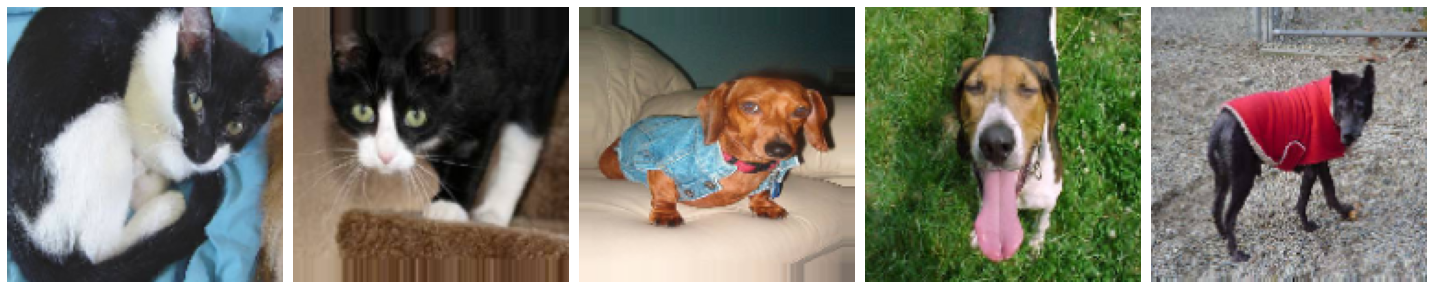

In [8]:
batch_size = 128 
epochs = 15 
IMG_HEIGHT = 150 
IMG_WIDTH = 150

train_data_gen= train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

val_data_gen= test_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=validation_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

#takes aimage of the train data
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])


Found 2000 images belonging to 2 classes.


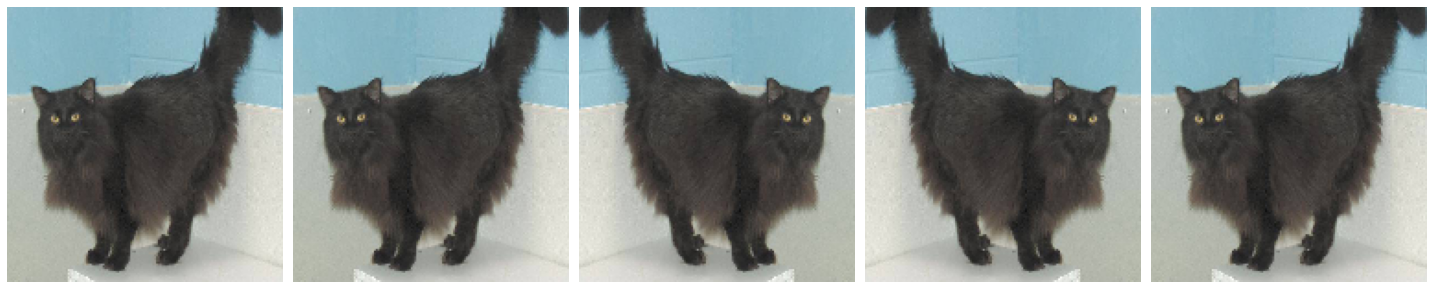

In [9]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# visualize the training images
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


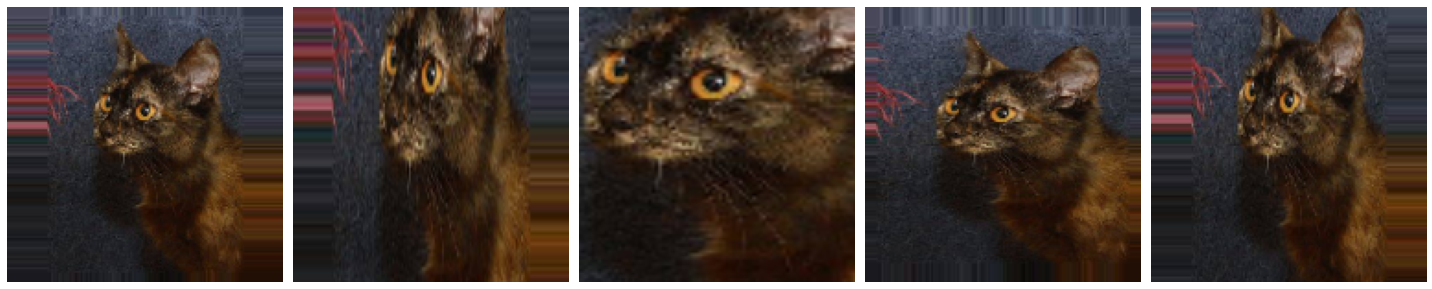

In [10]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) 
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [11]:
model=Sequential([
    Conv2D(16, 3, padding='same', activation='relu', #convolution with 16 filterns of 3 of size
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),                                     #drop out of 20% to turn off 20% on neurons
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),                                   #drop out of 20% to turn off 20% on neurons
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1)
])

In [12]:
model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("Model1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
hist = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks=[checkpoint,early])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - ETA: 0s - loss: 1.4617 - accuracy: 0.5000
Epoch 00001: val_accuracy improved from -inf to 0.50446, saving model to Model1.h5
15/15 [==============================] - 18s 1s/step - loss: 1.4617 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5045
Epoch 2/15
15/15 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5000
Epoch 00002: val_accuracy did not improve from 0.50446
15/15 [==============================] - 18s 1s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 3/15
15/15 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5000
Epoch 00003: val_accuracy improved from 0.50446 to 0.51228, saving model to Model1.h5
15/15 [==============================] - 19s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5123
Epoch 4/15
15/15 [=============